In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Define the folder path
folder_path = 'MSD/2p5_HA'

def read_msd(folder_path: str, sample_name: str):
    """
    takes path to folder containing CSV files with columns 'time' and 'MSD'
    returns dictionary with sample names as keys and dataframes (time, MSD) as values
    """
    # Initialize an empty dictionary to store the DataFrames
    data_dict = {}

    # List all files in the specified folder
    files = os.listdir(folder_path)

    # Iterate through each file in the folder
    for i, file_name in enumerate(files):
        # Construct the full file path
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Extract 'time' and 'MSD' columns and filter by time <= 1 second
        df = df[['time', 'MSD']]
        df = df[df['time'] <= 1]
        
        # Construct the key for the dictionary
        dict_key = f'{sample_name}_{i + 1}'
        
        # Add the DataFrame to the dictionary
        data_dict[dict_key] = df

        return data_dict



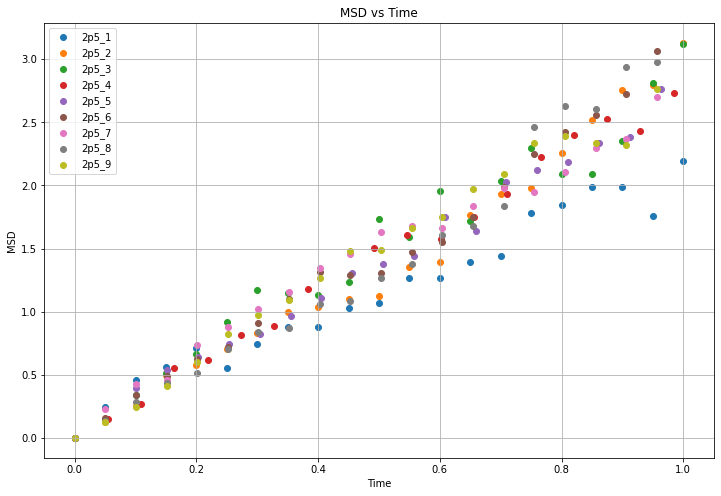

In [3]:
# Plotting MSD vs time for each DataFrame in the dictionary
plt.figure(figsize=(12, 8))

for key, df in data_dict.items():
    plt.scatter(df['time'], df['MSD'], label=key)

plt.xlabel('Time')
plt.ylabel('MSD')
plt.title('MSD vs Time')
plt.legend()
plt.grid(True)
plt.show()

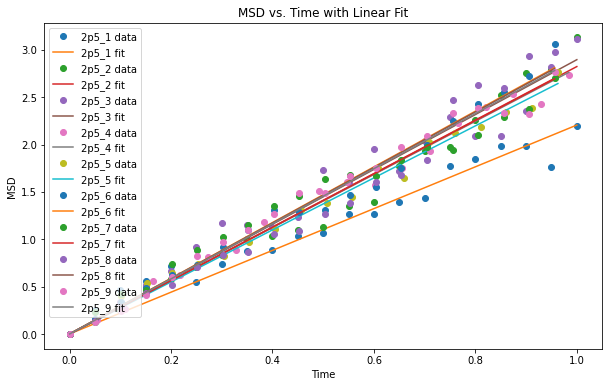

  Sample     Slope
0  2p5_1  2.206252
1  2p5_2  2.823622
2  2p5_3  2.896188
3  2p5_4  2.807325
4  2p5_5  2.746888
5  2p5_6  2.940526
6  2p5_7  2.817080
7  2p5_8  2.930545
8  2p5_9  2.909044


In [4]:
# Function to perform linear regression through the origin
def linear_regression_through_origin(df):
    X = df['time'].values
    y = df['MSD'].values
    slope = np.sum(X * y) / np.sum(X ** 2)
    return slope

# Dataframe to store sample names and slopes
results = []

# Perform linear regression for each sample
for sample_name, df in data_dict.items():
    slope = linear_regression_through_origin(df)
    results.append({'Sample': sample_name, 'Slope': slope})

# Convert results to a dataframe
results_df = pd.DataFrame(results)

# Plot MSD vs. time with fit lines
plt.figure(figsize=(10, 6))
for sample_name, df in data_dict.items():
    slope = results_df[results_df['Sample'] == sample_name]['Slope'].values[0]
    plt.plot(df['time'], df['MSD'], 'o', label=f'{sample_name} data')
    plt.plot(df['time'], slope * df['time'], '-', label=f'{sample_name} fit')

plt.xlabel('Time')
plt.ylabel('MSD')
plt.legend()
plt.title('MSD vs. Time with Linear Fit')
plt.show()

# Display the results dataframe
print(results_df)

/usr/lib/python3/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diffcoeff'>

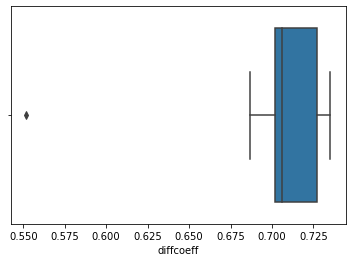

In [5]:
results_df['diffcoeff']=results_df['Slope']/4
sns.boxplot(results_df['diffcoeff'])